# Example 1

In [1]:
import optimus

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
frequency = 1000
radius = 1.0
location = (0, 0, 0)
velocity = 0.04
material_ext = optimus.material.load_material('water')
piston = optimus.source.create_piston(
    frequency, radius=radius, location=location, source_axis=(1, 0, 0), velocity=velocity)

In [3]:
source = optimus.source.transducers._Transducer(piston, material_ext, location, (1, 0, 0), True)

Number of point sources across element diameter: 9
Number of point sources in transducer: 49


In [4]:
source_location, source_weight = source.generate_source_points()

Number of point sources across element diameter: 9
Number of point sources in transducer: 49


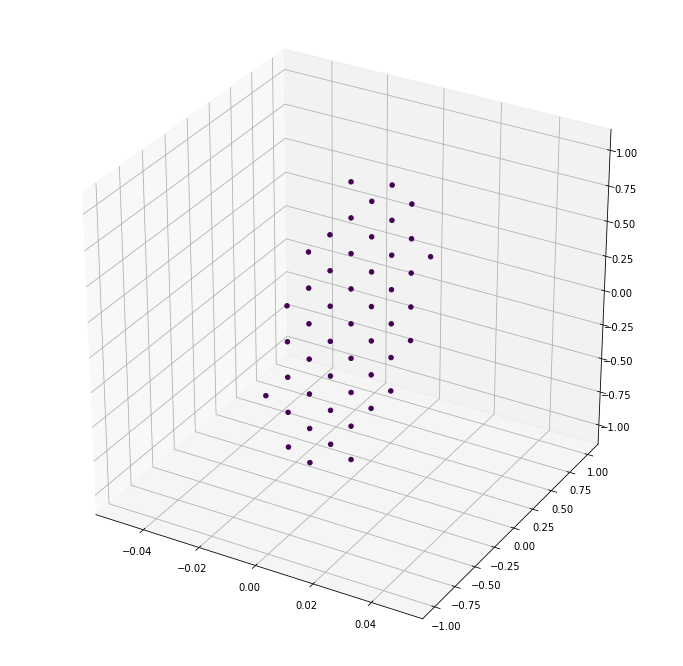

In [5]:
# Plot source locations

sx = np.zeros(source_location[0].shape)
sy = source_location[1]
sz = source_location[2]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(sx, sy, sz, c=source_weight.real, alpha=1.0)

In [6]:
wavelength = material_ext.speed_of_sound / frequency
wavenumber = 2 * np.pi / wavelength
number_of_point_sources_per_wavelength = 6
distance_between_points = wavelength / number_of_point_sources_per_wavelength
n_points_per_diameter = 2 * radius / distance_between_points
n_point_sources = int(np.ceil(n_points_per_diameter))

In [7]:
coords = np.linspace(-radius, radius, n_point_sources)

In [8]:
source_vector = np.vstack(
    (
        np.repeat(coords, n_point_sources),
        np.tile(coords, n_point_sources),
        np.zeros(n_point_sources**2),
    ))

In [9]:
distance = np.linalg.norm(source_vector[:2, :], axis=0)

In [10]:
inside = distance <= radius

In [11]:
locations_inside_transducer = source_vector[:, inside]

In [12]:
n_sources = locations_inside_transducer.shape[1]

In [13]:
surface_area_weighting = np.pi * radius**2 / n_sources

In [14]:
source_weight_ = surface_area_weighting * velocity

In [15]:
source_weight_

0.002564565431501872

# Example 2

In [16]:
frequency = 0.5e6
radius = 0.01
location = (0, 0, 0)

In [74]:
wavelength = 1500 / frequency
wavenumber = 2 * np.pi / wavelength
number_of_point_sources_per_wavelength = 4
distance_between_points = wavelength / number_of_point_sources_per_wavelength
n_points_per_diameter = 2 * radius / distance_between_points
n_point_sources = int(np.ceil(n_points_per_diameter))

In [75]:
coords = np.linspace(-radius, radius, n_point_sources)
source_vector = np.vstack(
    (
        np.repeat(coords, n_point_sources),
        np.tile(coords, n_point_sources),
        np.zeros(n_point_sources**2),
    ))

In [76]:
distance = np.linalg.norm(source_vector[:2, :], axis=0)

In [77]:
inside = distance <= radius

In [78]:
locations_inside_transducer = source_vector[:2, inside]

In [79]:
n_sources = locations_inside_transducer.shape[1]

In [80]:
surface_area_weighting = np.pi * radius**2 / n_sources

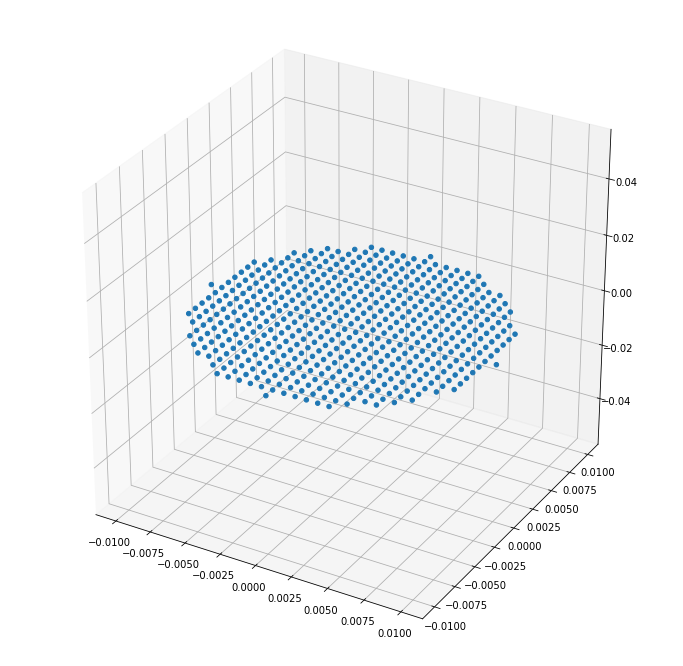

In [81]:
# Plot source locations

sx = locations_inside_transducer[0, :]
sy = locations_inside_transducer[1, :]
sz = np.zeros(locations_inside_transducer.shape[1])

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(sx, sy, sz, alpha=1.0)

In [ ]:
def point_source_locations(radius, frequency, speed_of_sound):
    wavelength = speed_of_sound / frequency
    number_of_point_sources_per_wavelength = 6
    distance_between_points = wavelength / number_of_point_sources_per_wavelength
    n_points_per_diameter = 2 * radius / distance_between_points
    n_point_sources = int(np.ceil(n_points_per_diameter))
    
    coords = []
    
    for i in range(n_point_sources):
        x = i * 2 * radius / (n_point_sources - 1) - radius
        for j in range(n_point_sources):
            y = j * 2 * radius / (n_point_sources - 1) - radius
            z = 0.0
            
            if np.sqrt(x*x + y*y) < radius:
                coords.append(x)
                coords.append(y)
                coords.append(z)
        
    coords_ = np.array(coords)
    
    return coords_.reshape(-1, 3)

In [ ]:
locations_inside_transducer_ = point_source_locations(radius, frequency, speed_of_sound=1500)

In [ ]:
# Check if equal to OptimUS implementation

print("Is equal to OptimUS:", np.allclose(locations_inside_transducer_[:, :2], locations_inside_transducer.T))

In [ ]:
# Plot source locations

sx = locations_inside_transducer_[:, 0]
sy = locations_inside_transducer_[:, 1]
sz = locations_inside_transducer_[:, 2]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(sx, sy, sz, alpha=1.0)